In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
data=pd.read_csv("C:/Users/SRISTI/Desktop/practice text doc/IBM-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
ds=data.copy()

## EDA

In [4]:
ds.shape

(1470, 35)

Dataset has 1470 rows and 35 columns.

In [5]:
ds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dataset has 26 int type and 9 object type columns.

In [7]:
ds.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null values in this dataset.

In [8]:
ds.Attrition.unique()

array(['Yes', 'No'], dtype=object)

Our target variable has two unique values.

In [9]:
ds.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

There are 3 unique value in  BusinessTravel.

In [10]:
ds.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

Department has 3 unique value in it.

In [11]:
ds.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

EducationField has 6 unique values.

In [12]:
ds.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
ds.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

JobRole has 9 unique values.

In [14]:
ds.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [15]:
ds.Over18.unique()

array(['Y'], dtype=object)

If we see this column which means employees are above 18 or not, according to me there is no need for such column because everone knows that no one hire a person who is below 18 that means abviously every one will be above 18 who is working, it is understood. So we can drop this column

In [16]:
ds. OverTime.unique()

array(['Yes', 'No'], dtype=object)

 OverTime has 2 unique values.

In [17]:
ds.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Now droping that columns which are not required, such as EmployeeCount(only one type of value in all rows),EmployeeNumber(no requirement for this column),StandardHours(only one type of value in all rows) and Over18(only one type of value in all rows).

In [18]:
ds.drop(columns=['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1,inplace=True)

In [19]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Making DataFrame of categorical data

In [20]:
df_catcol=ds[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']].copy()


In [21]:
df_catcol.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


### Making DataFrame of numerical data

In [22]:
df_numcol=ds[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel',
            'JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
            'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
            'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].copy()


In [23]:
df_numcol.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


### Univariate Analysis

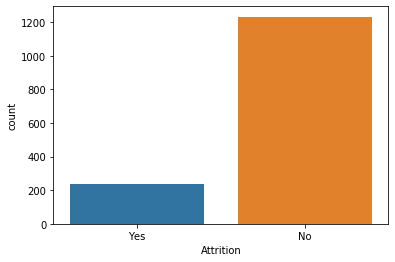

In [24]:
# for categorical data

sns.countplot(ds['Attrition'])

From above plot we can see that there is a class imbalance problem, we try to balance the data further.

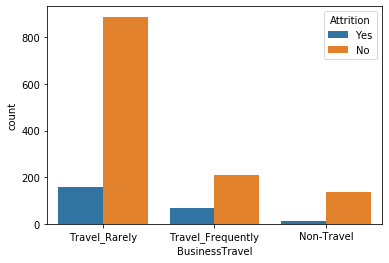

In [25]:
sns.countplot(x='BusinessTravel',data=df_catcol,hue='Attrition')

Employee who travel more have higher chance for attrition.

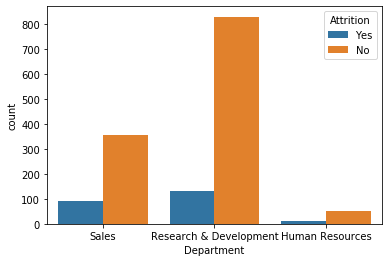

In [26]:
sns.countplot(x='Department',data=df_catcol,hue='Attrition')

Employee from sales and human resources dept. have higher attrition.

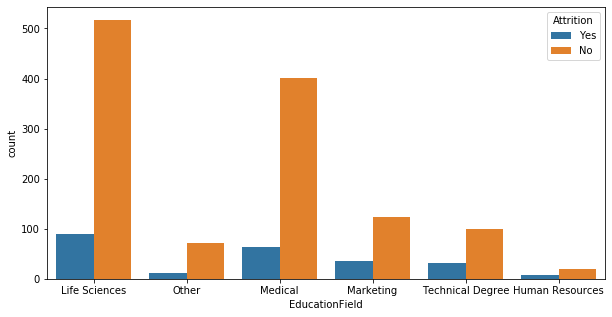

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',data=df_catcol,hue='Attrition')

Employee who are from technical degree and human resources have more chance to attrition.

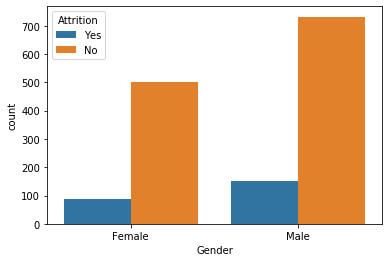

In [28]:
sns.countplot(x='Gender',data=df_catcol,hue='Attrition')

Males quiting chance is more than females.

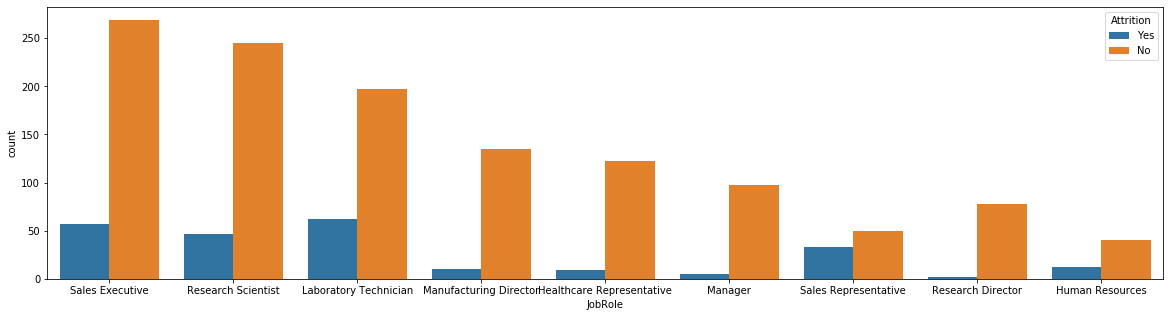

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(x='JobRole',data=df_catcol,hue='Attrition')

Employee in laboratory technician,sales representative and human resources have higher rate for attrition.

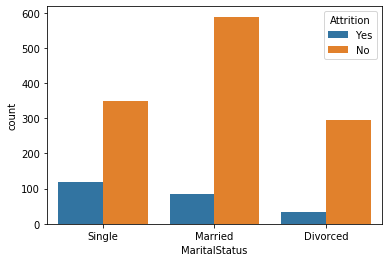

In [30]:
sns.countplot(x='MaritalStatus',data=df_catcol,hue='Attrition')

singles are more quited than others.

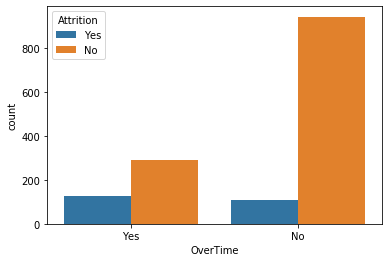

In [31]:
sns.countplot(x='OverTime',data=df_catcol,hue='Attrition')

Employees who do overtime are more likely to quit than who do not overtime.

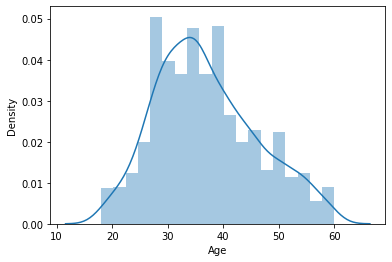

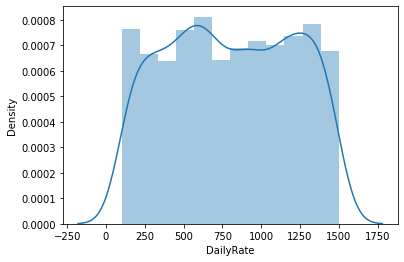

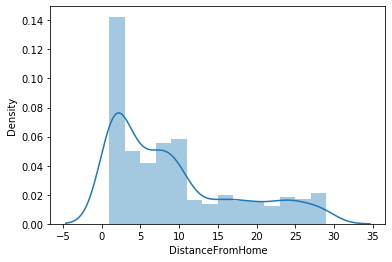

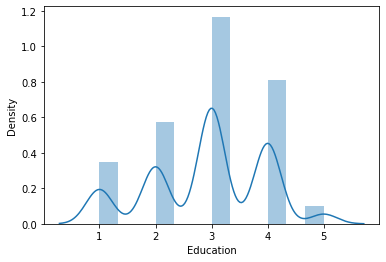

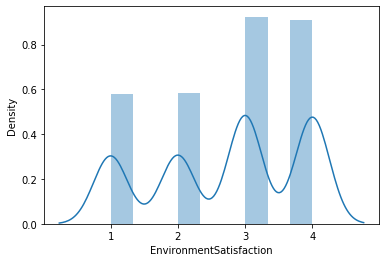

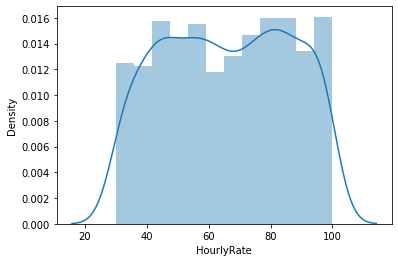

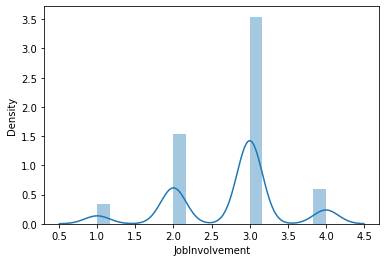

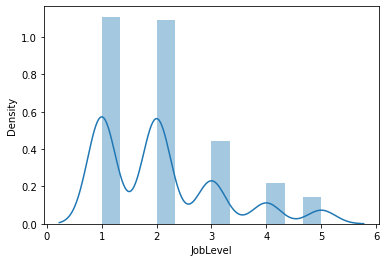

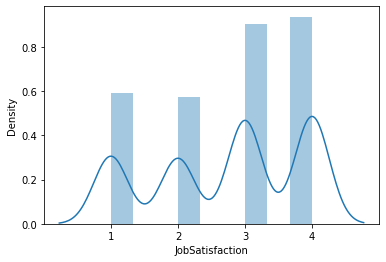

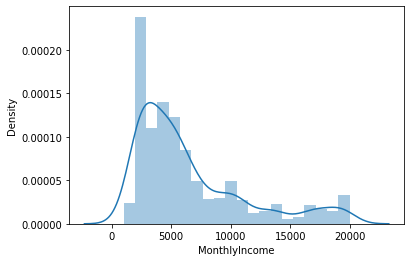

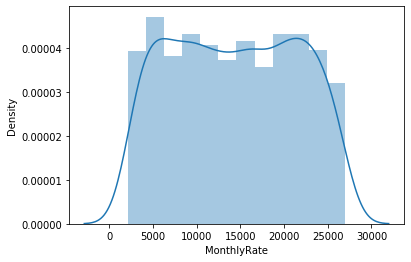

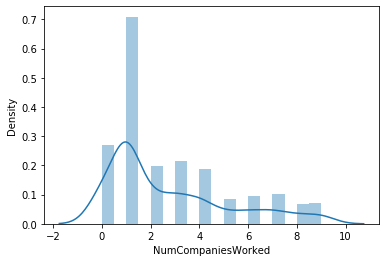

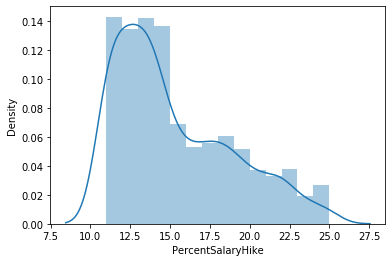

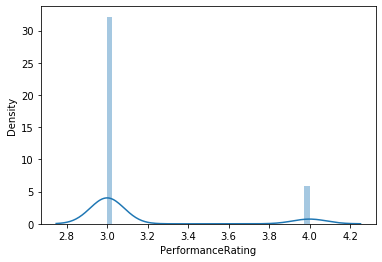

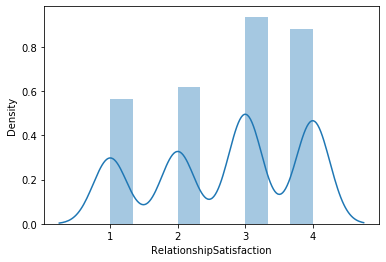

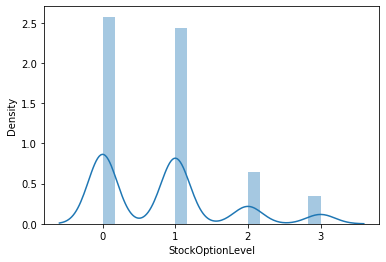

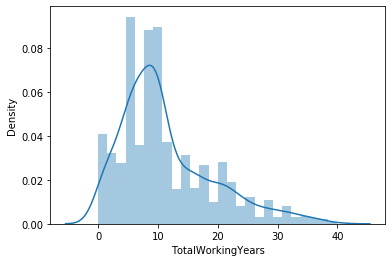

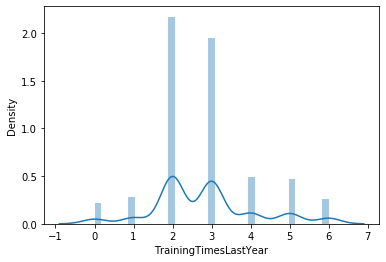

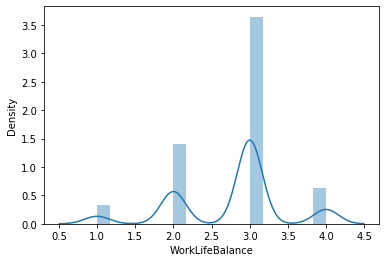

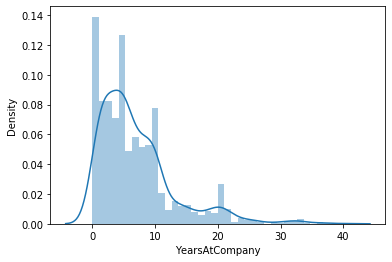

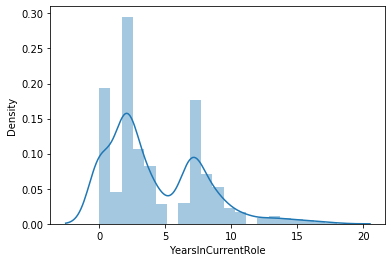

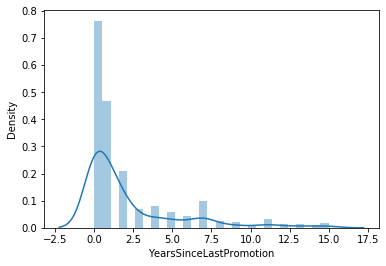

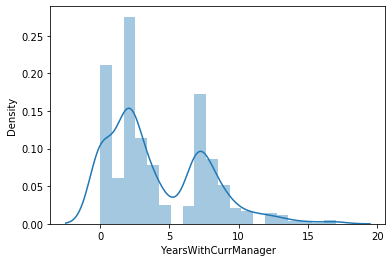

In [32]:
# for numerical data

for i in df_numcol.columns:
    sns.distplot(df_numcol[i])
    plt.show()

None of columns are normally distributed. some of columns are right skewed.

### Bivariate Analysis

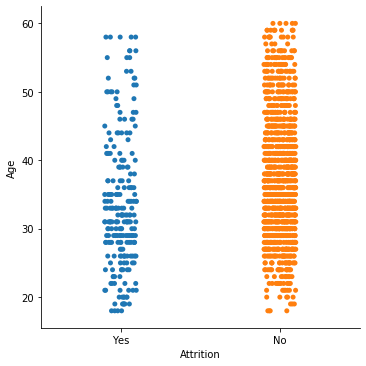

In [33]:
sns.catplot(y='Age',x='Attrition',data=ds)

Who has age between 28 to 35 approximately are likely to quit more than others age group.

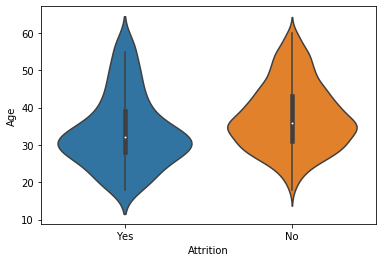

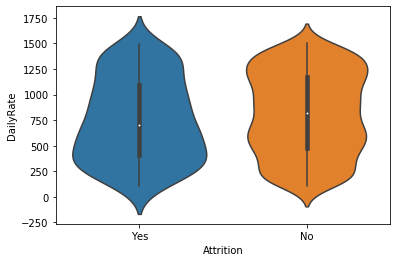

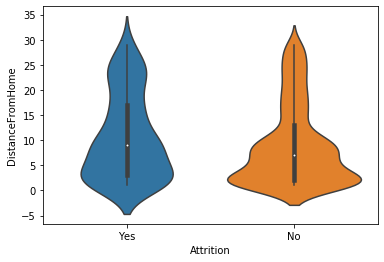

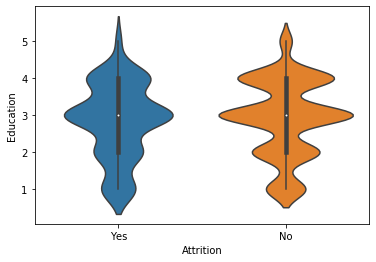

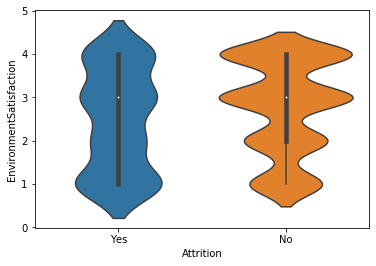

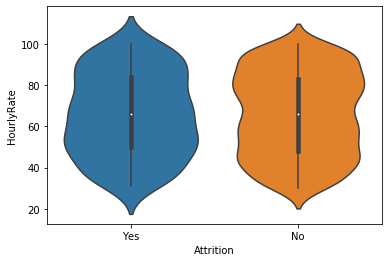

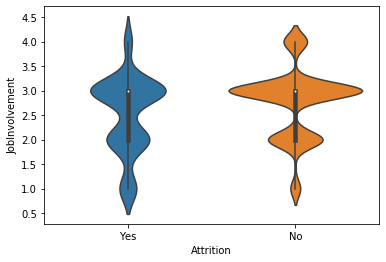

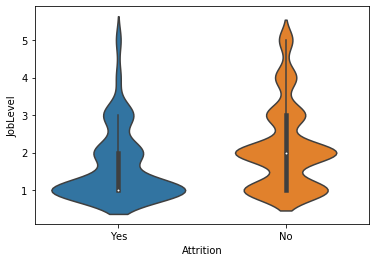

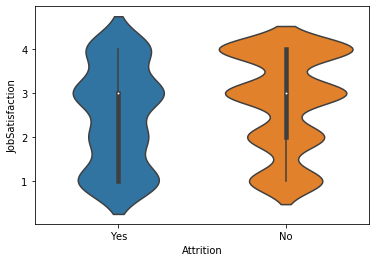

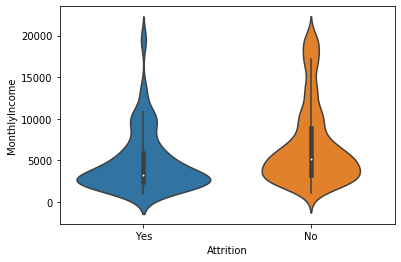

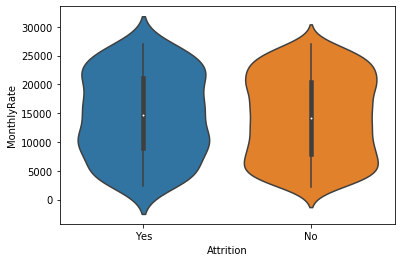

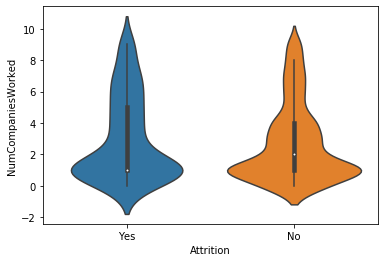

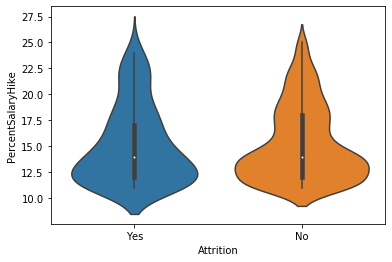

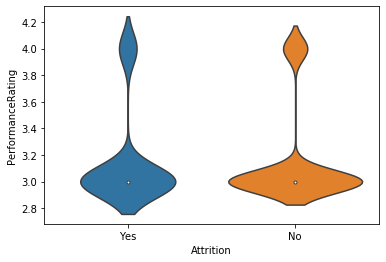

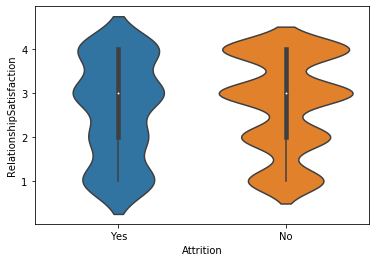

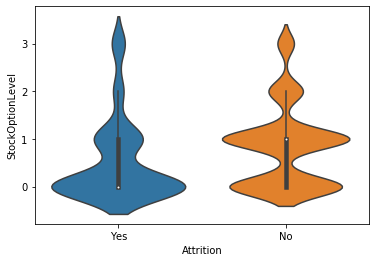

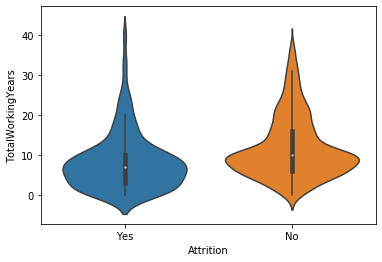

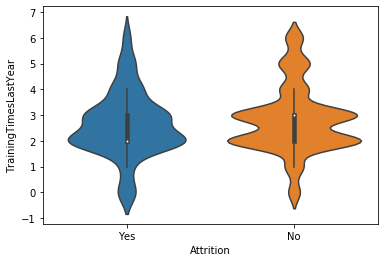

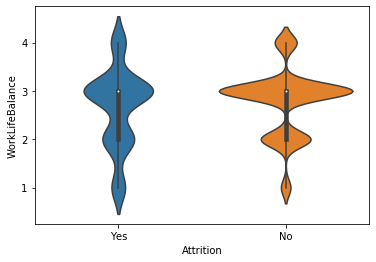

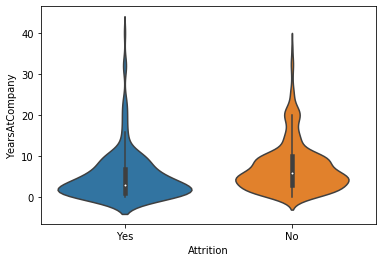

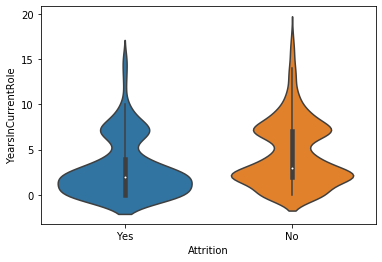

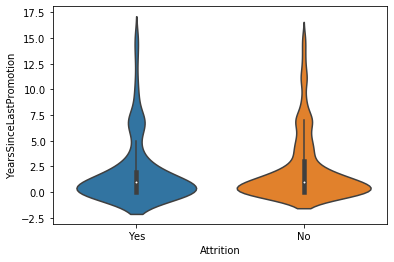

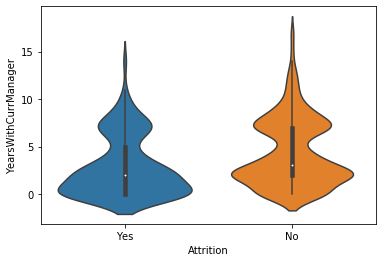

In [34]:
for i in df_numcol.columns:
    sns.violinplot(y=i,x='Attrition',data=ds)
    plt.show()

Observations:
If peoples are less satisfy with Environment they are tend to quit more.
People who have avg. of 40 to 60 HourlyRate have more chance to quit.
People having initial level of Job are more tend to quit.
Less hike in salary high the attrition.
Less the StockOptionLevel more the attrition.
Poor level of WorkLifeBalance tend to more attrition.
YearAtCompany, who started their job have higher chance to quit because of having more better option.
YearInCurrentRole, who started their carrier are likely to quit more.
Who didn't got promotion are tend to quit more.

### Multivariate Analysis

In [35]:
ds.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


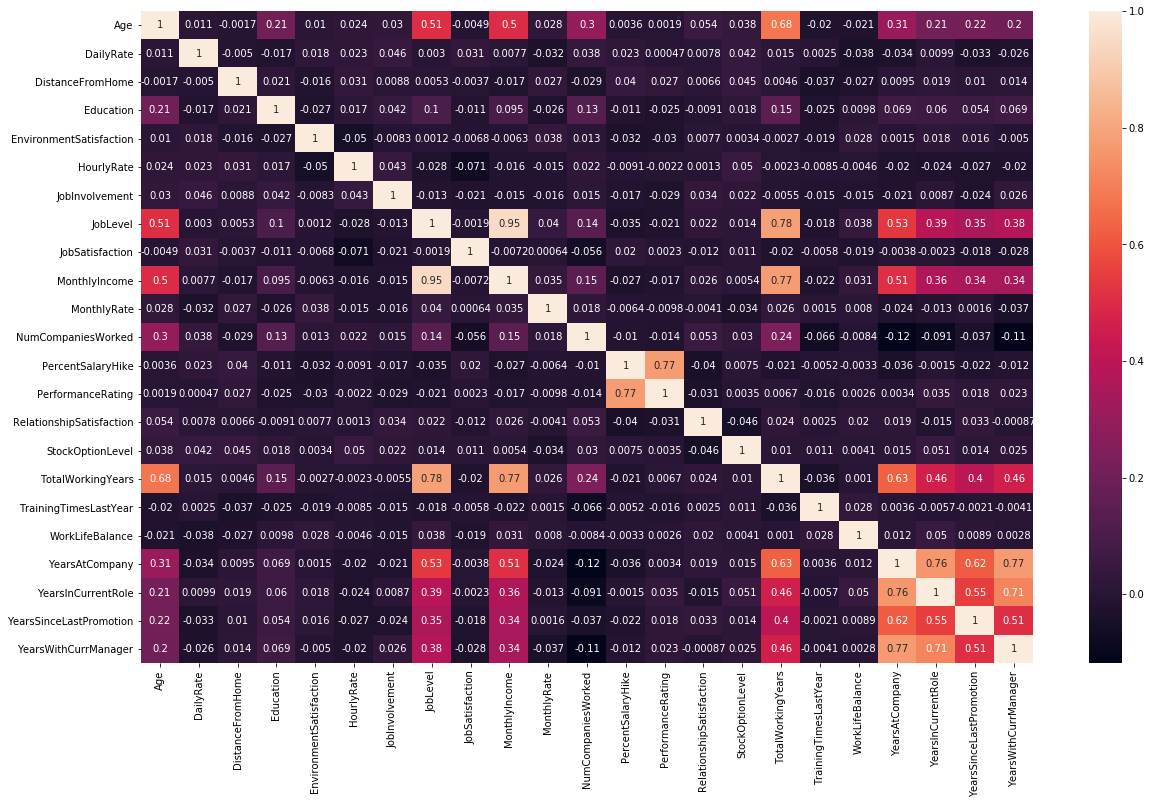

In [36]:
plt.figure(figsize=(20,12))
sns.heatmap(ds.corr(),annot=True)

There are multicollinearity available between many features such as,
MonthlyIncome is very much correlated with JobLevel,TotalWorkingyears,Age,YearsAtCompany. so we can drop this column.
performanceRating is highly correlated with PercentSalaryHike, so we are going to drop is also.
YearsAtCompany is good correlated with TotalWorkingYears,YearsInCurrentRole,YearSinceLastPromotion and YearsWithCurrManager.
we are going to remove it but if there is any need we can consider to drop it,till then we keep it.

### Encoding and Feature Engineering

In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
df_catcol.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [39]:
oe=OrdinalEncoder()

In [40]:
for i in df_catcol.columns:
        df_catcol[i]=oe.fit_transform(df_catcol[i].values.reshape(-1,1)) 

In [41]:
df_catcol

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1.0,2.0,2.0,1.0,0.0,7.0,2.0,1.0
1,0.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0
2,1.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0
3,0.0,1.0,1.0,1.0,0.0,6.0,1.0,1.0
4,0.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1465,0.0,1.0,1.0,3.0,1.0,2.0,1.0,0.0
1466,0.0,2.0,1.0,3.0,1.0,0.0,1.0,0.0
1467,0.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0
1468,0.0,1.0,2.0,3.0,1.0,7.0,1.0,0.0


In [42]:
df_catcol=pd.get_dummies(df_catcol,columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])
df_catcol.head()

,Attrition,Gender,OverTime,BusinessTravel_0.0,BusinessTravel_1.0,BusinessTravel_2.0,Department_0.0,Department_1.0,Department_2.0,EducationField_0.0,...,JobRole_2.0,JobRole_3.0,JobRole_4.0,JobRole_5.0,JobRole_6.0,JobRole_7.0,JobRole_8.0,MaritalStatus_0.0,MaritalStatus_1.0,MaritalStatus_2.0
0,1.0,0.0,1.0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0.0,1.0,0.0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.0,1.0,1.0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,0.0,1.0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.0,1.0,0.0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


### Checking for outlier

In [43]:
df_numcol.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [45]:
df_numcol=df_numcol.drop(columns=['MonthlyIncome','PerformanceRating'],axis=1)

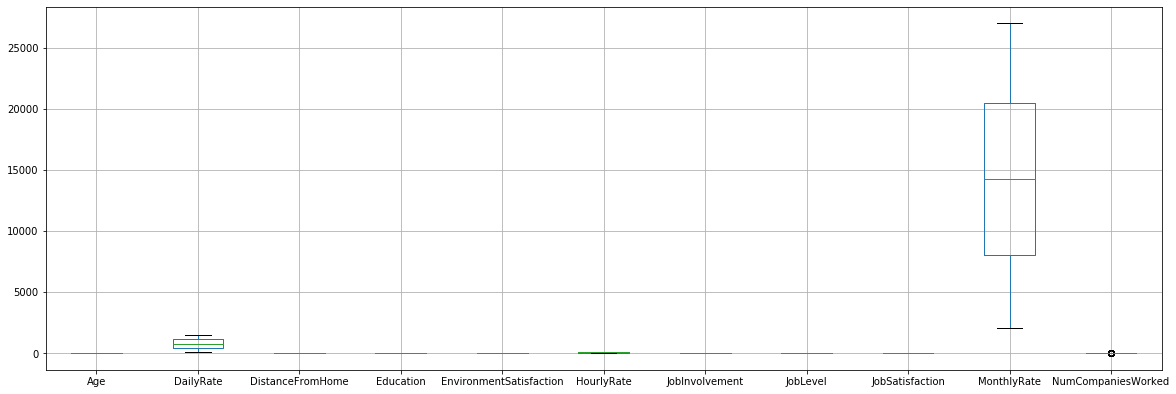

In [46]:
df_numcol.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

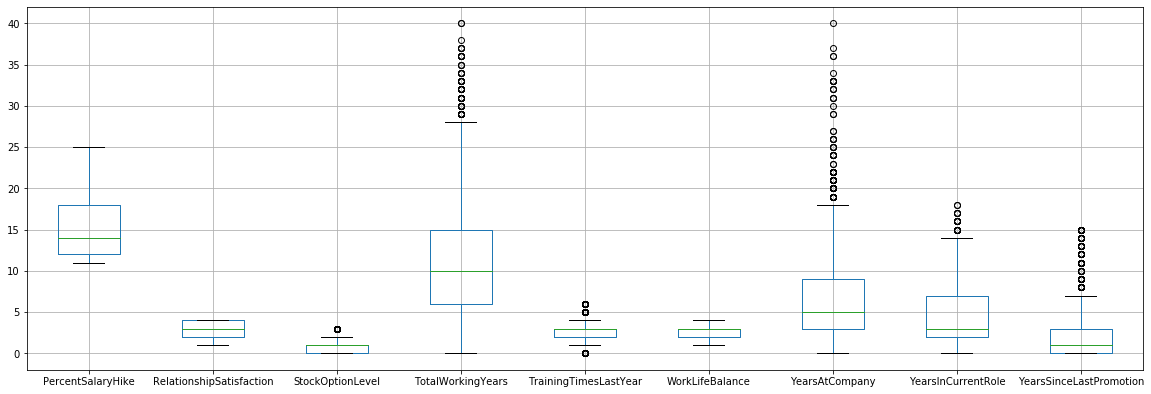

In [47]:
df_numcol.iloc[:,11:-1].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

There are many columns in which outliers are present, we are going to remove it.

In [48]:
def iqr_cap(df,cols,factor):
    for col in cols:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        up_wsk=q3+(factor*iqr)
        lw_wsk=q1-(factor*iqr)
        df[col]=np.where(df[col]>up_wsk, up_wsk, np.where(df[col]<lw_wsk, lw_wsk, df[col]))

In [49]:
col=['NumCompaniesWorked','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
    'YearsInCurrentRole','YearsSinceLastPromotion']
iqr_cap(df_numcol,col,1.5)

### After Removing Outliers 

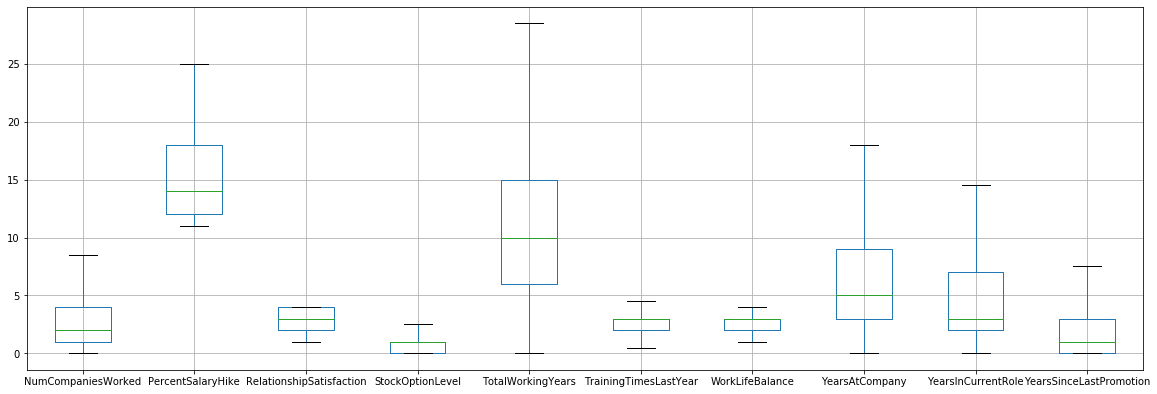

In [50]:
df_numcol.iloc[:,10:-1].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

We sucessfully removed outliers.

### Checking the Skewness

In [51]:
df_numcol.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyRate                 0.018578
NumCompaniesWorked          0.971516
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.664714
TotalWorkingYears           0.855518
TrainingTimesLastYear       0.117931
WorkLifeBalance            -0.552480
YearsAtCompany              0.900774
YearsInCurrentRole          0.803704
YearsSinceLastPromotion     1.262563
YearsWithCurrManager        0.833451
dtype: float64

columns which has skewness---DistanceFromHome,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,
WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.

In [52]:
df_numcol.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [53]:
from sklearn.preprocessing import PowerTransformer

In [54]:
list1=['DistanceFromHome','JobLevel','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel',
       'TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
       'YearsWithCurrManager']

pt=PowerTransformer(method='yeo-johnson',standardize=True)
for i in list1:
    df_numcol[i]=pt.fit_transform(df_numcol[i].values.reshape(-1,1))

In [55]:
df_numcol.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.007468
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.103624
JobSatisfaction            -0.329672
MonthlyRate                 0.018578
NumCompaniesWorked          0.012558
PercentSalaryHike           0.116250
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.060268
TotalWorkingYears          -0.027114
TrainingTimesLastYear       0.117931
WorkLifeBalance            -0.012286
YearsAtCompany             -0.040850
YearsInCurrentRole         -0.067527
YearsSinceLastPromotion     0.187060
YearsWithCurrManager       -0.067565
dtype: float64

We sucessfuly overcome the skewnesss features data.

Now we are going to concatenate the all the columns together.

In [56]:
ds_new=pd.concat([df_catcol,df_numcol],axis=1)
ds_new

,Attrition,Gender,OverTime,BusinessTravel_0.0,BusinessTravel_1.0,BusinessTravel_2.0,Department_0.0,Department_1.0,Department_2.0,EducationField_0.0,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.0,0.0,1.0,0,0,1,0,0,1,0,...,-1.488918,1,-1.091366,-0.256809,0.5,-2.144446,0.127480,0.203540,-1.097951,0.490147
1,0.0,1.0,0.0,0,1,0,0,1,0,0,...,1.679689,4,0.552154,0.047440,3.0,0.276821,0.821175,0.890293,0.093638,0.909635
2,1.0,1.0,1.0,0,0,1,0,1,0,0,...,0.201133,2,-1.091366,-0.425680,3.0,0.276821,-2.127120,-1.593299,-1.097951,-1.550156
3,0.0,0.0,1.0,0,1,0,0,1,0,0,...,-1.488918,3,-1.091366,-0.256809,3.0,0.276821,0.503818,0.890293,0.932625,-1.550156
4,0.0,1.0,0.0,0,0,1,0,1,0,0,...,-0.948760,4,0.552154,-0.608891,3.0,0.276821,-0.985319,-0.451816,0.619703,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0,1,0,0,1,0,0,...,0.719724,3,0.552154,0.891331,3.0,0.276821,-0.092295,-0.451816,-1.097951,-0.053000
1466,0.0,1.0,0.0,0,0,1,0,1,0,0,...,0.201133,1,0.552154,-0.099733,4.5,0.276821,0.324592,0.890293,0.093638,0.909635
1467,0.0,1.0,1.0,0,0,1,0,1,0,0,...,1.281630,2,0.552154,-0.608891,0.5,0.276821,0.127480,-0.451816,-1.097951,-0.053000
1468,0.0,1.0,0.0,0,1,0,0,0,1,0,...,-0.121307,4,-1.091366,0.891331,3.0,-1.108624,0.668523,0.686391,-1.097951,1.090110


### Spliting the data

In [57]:
x=ds_new.drop('Attrition',axis=1)
x.head()

,Gender,OverTime,BusinessTravel_0.0,BusinessTravel_1.0,BusinessTravel_2.0,Department_0.0,Department_1.0,Department_2.0,EducationField_0.0,EducationField_1.0,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1.0,0,0,1,0,0,1,0,1,...,-1.488918,1,-1.091366,-0.256809,0.5,-2.144446,0.127480,0.203540,-1.097951,0.490147
1,1.0,0.0,0,1,0,0,1,0,0,1,...,1.679689,4,0.552154,0.047440,3.0,0.276821,0.821175,0.890293,0.093638,0.909635
2,1.0,1.0,0,0,1,0,1,0,0,0,...,0.201133,2,-1.091366,-0.425680,3.0,0.276821,-2.127120,-1.593299,-1.097951,-1.550156
3,0.0,1.0,0,1,0,0,1,0,0,1,...,-1.488918,3,-1.091366,-0.256809,3.0,0.276821,0.503818,0.890293,0.932625,-1.550156
4,1.0,0.0,0,0,1,0,1,0,0,0,...,-0.948760,4,0.552154,-0.608891,3.0,0.276821,-0.985319,-0.451816,0.619703,-0.406881


In [58]:
y=ds_new['Attrition']
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

### Handling the class imbalance problem by oversampling the minority class

In [61]:
y.value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

In [62]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [63]:
x,y=sm.fit_resample(x,y)

In [64]:
y.value_counts()

0.0    1233
1.0    1233
Name: Attrition, dtype: int64

Now dataset has balance target variable.

### Scaling of data

In [66]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [77]:
x_new=ss.fit_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)
x_new.head()

,Gender,OverTime,BusinessTravel_0.0,BusinessTravel_1.0,BusinessTravel_2.0,Department_0.0,Department_1.0,Department_2.0,EducationField_0.0,EducationField_1.0,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.353412,1.369747,-0.257192,-0.422153,0.810715,-0.161917,-1.037187,1.785149,-0.105215,1.528706,...,-1.583317,-1.445859,-0.981690,-0.070587,-2.20272,-2.130352,0.320652,0.385912,-1.136688,0.686711
1,0.856013,-0.847158,-0.257192,2.368810,-1.233480,-0.161917,0.964146,-0.560177,-0.105215,1.528706,...,1.784802,1.414923,0.754919,0.240617,0.34455,0.340331,1.038140,1.109349,0.135100,1.125112
2,0.856013,1.369747,-0.257192,-0.422153,0.810715,-0.161917,0.964146,-0.560177,-0.105215,-0.654148,...,0.213148,-0.492265,-0.981690,-0.243317,0.34455,0.340331,-2.011282,-1.506910,-1.136688,-1.445581
3,-1.353412,1.369747,-0.257192,2.368810,-1.233480,-0.161917,0.964146,-0.560177,-0.105215,1.528706,...,-1.583317,0.461329,-0.981690,-0.070587,0.34455,0.340331,0.709898,1.109349,1.030553,-1.445581
4,0.856013,-0.847158,-0.257192,-0.422153,0.810715,-0.161917,0.964146,-0.560177,-0.105215,-0.654148,...,-1.009147,1.414923,0.754919,-0.430717,0.34455,0.340331,-0.830317,-0.304452,0.696571,-0.250761


In [78]:
x=x_new.copy()

### Finding the best random State

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
maxacc=0
rs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc_sc=accuracy_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        rs=i
print('best acc_sc is:',maxacc,' at random state',rs)

best acc_sc is: 0.8931860036832413  at random state 182


In [83]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=182)

In [84]:
x_train.shape

(1923, 47)

In [85]:
x_test.shape

(543, 47)

In [86]:
y_train.shape

(1923,)

In [87]:
y_test.shape

(543,)

### Model Training

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC(probability=True)
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gnb=GaussianNB()
gbc=GradientBoostingClassifier()

In [93]:
model=[lg,dtc,svc,knn,rfc,ad,gnb,gbc]

for i in model:
    print("Model",i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('clasification_report',classification_report(y_test,pred))
    score=cross_val_score(i,x,y,cv=5)
    print(score.mean())
    print('\n')

Model LogisticRegression()
accuracy_score 0.9410681399631676
confusion_matrix [[253  13]
 [ 19 258]]
clasification_report               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       266
         1.0       0.95      0.93      0.94       277

    accuracy                           0.94       543
   macro avg       0.94      0.94      0.94       543
weighted avg       0.94      0.94      0.94       543

0.891453630174672


Model DecisionTreeClassifier()
accuracy_score 0.8766114180478821
confusion_matrix [[219  47]
 [ 20 257]]
clasification_report               precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       266
         1.0       0.85      0.93      0.88       277

    accuracy                           0.88       543
   macro avg       0.88      0.88      0.88       543
weighted avg       0.88      0.88      0.88       543

0.8313982803787437


Model SVC(probability=True)
accuracy_score 0.942909760589

We are going to that drop models which have difference between accuracy_score and cv_score greater than 4.
droped model : LogisticRegression, SVC, GradientBoostingClassifier.
With rest of the model we are going to perform hyperparameter tunning.

### Hyperparameter Tunning using GridSearchCV

In [95]:
# FOR DECISION TREE CLASSIFIER

parameters={'max_depth':np.arange(1,10),'criterion':['gini','entropy'],'splitter':['best','random'],
           'min_samples_leaf':np.arange(1,5),'min_samples_split':np.arange(1,10)}

gs=GridSearchCV(dtc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [96]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'best'}

In [97]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=4,min_samples_split=6,splitter='best')
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('accuracy_score',accuracy_score(y_test,preddt))
print('confusion_matrix',confusion_matrix(y_test,preddt))
print('clasification_report',classification_report(y_test,preddt))

accuracy_score 0.8729281767955801
confusion_matrix [[224  42]
 [ 27 250]]
clasification_report               precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       266
         1.0       0.86      0.90      0.88       277

    accuracy                           0.87       543
   macro avg       0.87      0.87      0.87       543
weighted avg       0.87      0.87      0.87       543



In [98]:
# FOR KNEIGHBORS CLASSIFIER

parameters={'n_neighbors':np.arange(1,10),'weights':['uniform','distance'],'n_jobs':[-1]}

gs=GridSearchCV(knn,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [99]:
gs.best_params_

{'n_jobs': -1, 'n_neighbors': 2, 'weights': 'uniform'}

In [100]:
kn=KNeighborsClassifier(n_jobs=-1,n_neighbors=2,weights='uniform')
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predkn))
print('confusion_matrix',confusion_matrix(y_test,predkn))
print('clasification_report',classification_report(y_test,predkn))

accuracy_score 0.9410681399631676
confusion_matrix [[252  14]
 [ 18 259]]
clasification_report               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       266
         1.0       0.95      0.94      0.94       277

    accuracy                           0.94       543
   macro avg       0.94      0.94      0.94       543
weighted avg       0.94      0.94      0.94       543



In [101]:
# FOR RANDOM FOREST CLASSIFIER

parameterS={'n_estimators':(100,150,200,250),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

gs=GridSearchCV(rfc,parameterS,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 200, 250)})

In [102]:
gs.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}

In [103]:
rf=RandomForestClassifier(criterion='entropy',max_features='auto',n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predrf))
print('confusion_matrix',confusion_matrix(y_test,predrf))
print('clasification_report',classification_report(y_test,predrf))

accuracy_score 0.9429097605893186
confusion_matrix [[259   7]
 [ 24 253]]
clasification_report               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       266
         1.0       0.97      0.91      0.94       277

    accuracy                           0.94       543
   macro avg       0.94      0.94      0.94       543
weighted avg       0.94      0.94      0.94       543



In [104]:
# FOR ADABOOST CLASSIFIER

parameters={'n_estimators':[50,100,150,200],'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'algorithm':['SAMME','SAMME.R']}
gs=GridSearchCV(ad,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150, 200]})

In [105]:
gs.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}

In [106]:
ad=AdaBoostClassifier(algorithm='SAMME.R',learning_rate= 1.0,n_estimators=150)
ad.fit(x_test,y_test)
predad=ad.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predad))
print('confusion_matrix',confusion_matrix(y_test,predad))
print('clasification_report',classification_report(y_test,predad))

accuracy_score 1.0
confusion_matrix [[266   0]
 [  0 277]]
clasification_report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       266
         1.0       1.00      1.00      1.00       277

    accuracy                           1.00       543
   macro avg       1.00      1.00      1.00       543
weighted avg       1.00      1.00      1.00       543



Here we can see that decision tree classifier did not improve even reduced.
Rest are kneighbors,random forest and adaboost these are improve and adaboost is giving us 100% accuracy.
Lets do compare these models with AUC_ROC_SCORE.
And we drop gaussianNB also because it has less accuracy as compare to above models, if we have better models then lets not go for less accuracy that why.

## AUC ROC CURVE AND SCORE

In [107]:
from sklearn.metrics import roc_auc_score,roc_curve

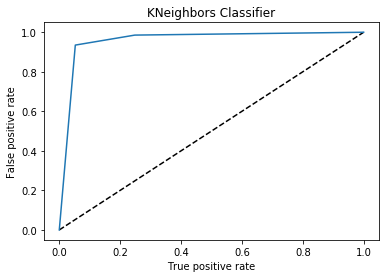

In [108]:
# FOR KNEIGHBORS CLASSIFIER

pred_prob=kn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('KNeighbors Classifier')
plt.show()

In [109]:
auc_score=roc_auc_score(y_test,predkn)
auc_score

0.9411932357970739

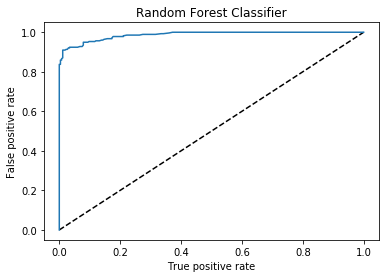

In [110]:
# RANDOM FOREST CLASSIFIER

pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [111]:
auc_score=roc_auc_score(y_test,predrf)
auc_score

0.9435208056241688

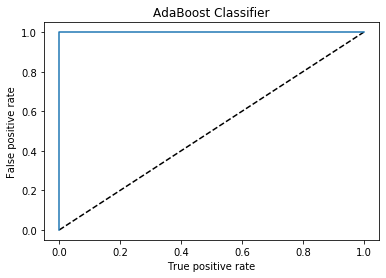

In [112]:
# ADABOOST CLASSIFIER

pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [113]:
auc_score=roc_auc_score(y_test,predad)
auc_score

1.0

After comparing all above algorithm on the basis of roc_auc_score we concluded that AdaBoostClassifier is our best model. It is giving us 100% accuracy.

### Saving our Final Model

In [114]:
import joblib

In [115]:
joblib.dump(ad,'HR_Analytics_Attrition_ada.obj')

['HR_Analytics_Attrition_ada.obj']